### 一、准备工作

In [1]:
#安装方式：pip install seaborn或conda install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
print(sns.__version__)

0.11.1


如果seaborn版本不是最新的，需要更新，可以在命令行界面输入:
`pip install —upgrade seaborn`

In [3]:
#查看seaborn有哪些自带的数据集
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [4]:
#分类问题：企鹅种类
penguin_df=sns.load_dataset("penguins")
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
#回归问题：估计餐馆顾客给的小费
tip_df=sns.load_dataset("tips")
tip_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 二、变量分布
我们拿到一个数据，首先要查看数值变量的分布，比如:
- 变量取值范围，是否有异常值(outliers)？
- 变量分布是否近似正态分布？如果不是，那么是否有偏移? 是否有双峰分布（bimodality）? 
- 如果依据类别变量对数据集进行划分，各子集上变量的分布是否有很大差异？

这些都是我们要考虑的问题。

#### 2.1 sns.boxplot()：查看数值变量的取值范围，是否有异常值

<AxesSubplot:xlabel='bill_length_mm'>

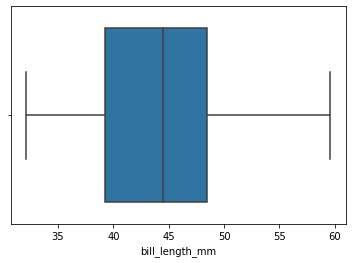

In [6]:
sns.boxplot(data=penguin_df,x="bill_length_mm")

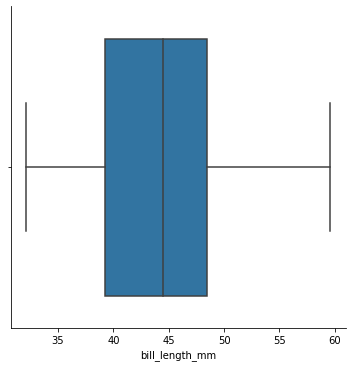

In [7]:
sns.catplot(data=penguin_df,x="bill_length_mm",kind="box")

<AxesSubplot:ylabel='bill_length_mm'>

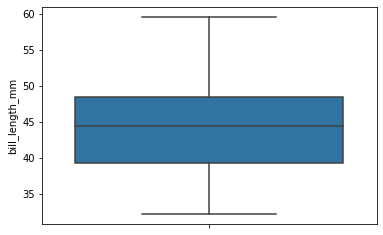

In [8]:
sns.boxplot(data=penguin_df,y="bill_length_mm")

<AxesSubplot:>

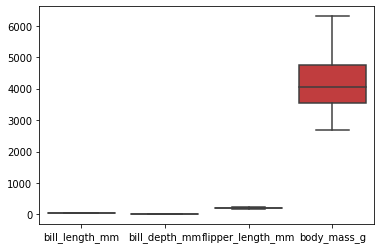

In [9]:
sns.boxplot(data=penguin_df)

<AxesSubplot:>

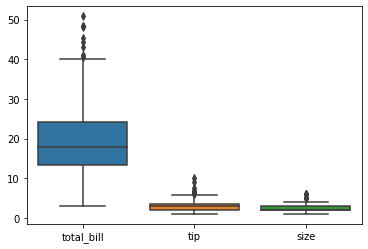

In [10]:
sns.boxplot(data=tip_df)

<AxesSubplot:xlabel='total_bill'>

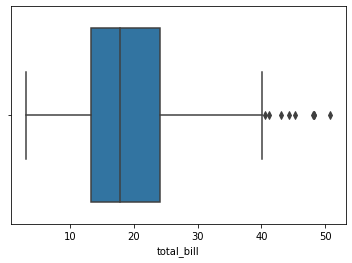

In [11]:
sns.boxplot(data=tip_df,x="total_bill")

#### 2.2 sns.displot():查看变量的分布

##### 直方图

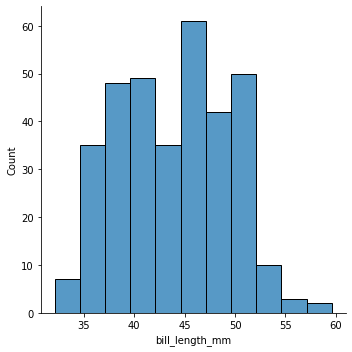

In [12]:
#默认为直方图
sns.displot(data=penguin_df,x="bill_length_mm")

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

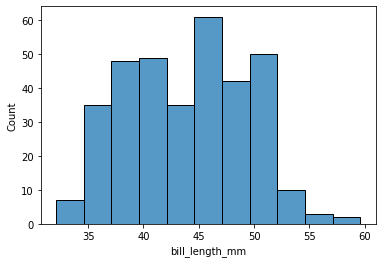

In [13]:
sns.histplot(penguin_df,x="bill_length_mm")

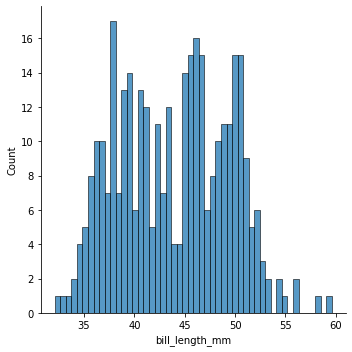

In [14]:
#改变分桶数
sns.displot(data=penguin_df,x="bill_length_mm",bins=50)

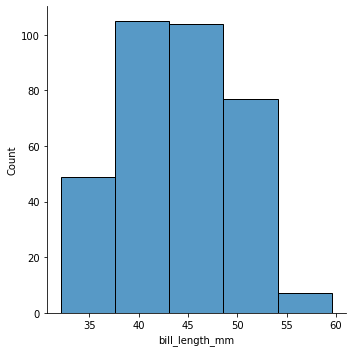

In [15]:
sns.displot(data=penguin_df,x="bill_length_mm",bins=5)

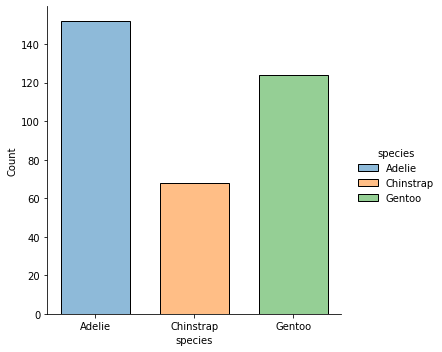

In [16]:
#类别变量
sns.displot(data=penguin_df,x="species",hue="species",shrink=.7)

<AxesSubplot:xlabel='species', ylabel='count'>

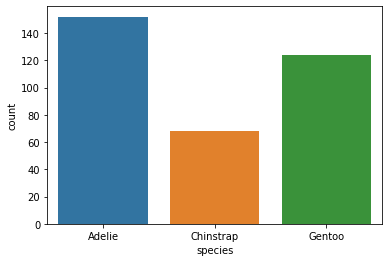

In [17]:
sns.countplot(data=penguin_df,x="species")

##### kde

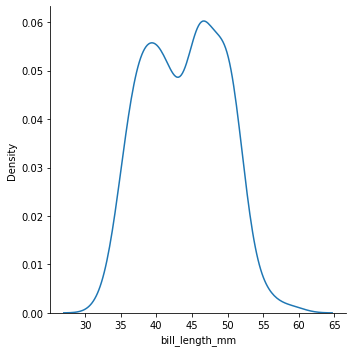

In [18]:
#kde
sns.displot(x="bill_length_mm",data=penguin_df,kind="kde")

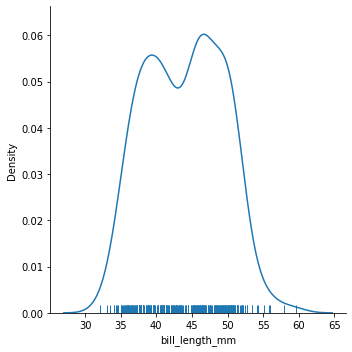

In [19]:
sns.displot(x="bill_length_mm",data=penguin_df,kind="kde",rug=True)

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

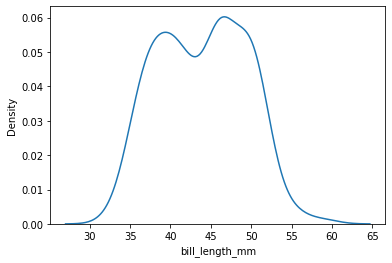

In [20]:
sns.kdeplot(x="bill_length_mm",data=penguin_df)

In [21]:
print(np.min(penguin_df["bill_length_mm"]))
print(np.max(penguin_df["bill_length_mm"]))

32.1
59.6


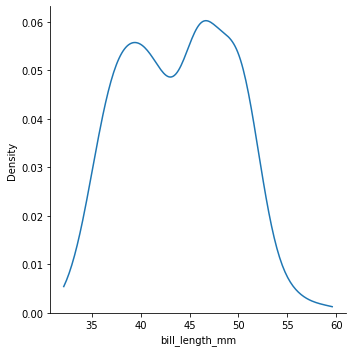

In [22]:
sns.displot(x="bill_length_mm",data=penguin_df,kind="kde",cut=0)

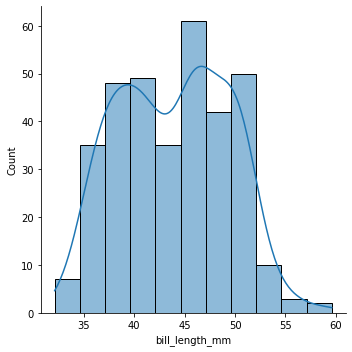

In [23]:
sns.displot(x="bill_length_mm",data=penguin_df,kde=True)

分析双峰分布：

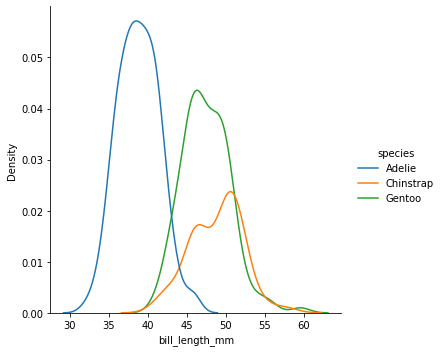

In [24]:
sns.displot(x="bill_length_mm",data=penguin_df,kind="kde",hue="species")

分布有偏移的情况：

In [25]:
#提示：数据集较大，第一次下载时可能耗时稍长。
dia_df=sns.load_dataset("diamonds")
dia_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='price'>

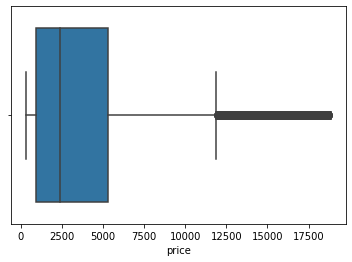

In [26]:
sns.boxplot(data=dia_df,x="price")

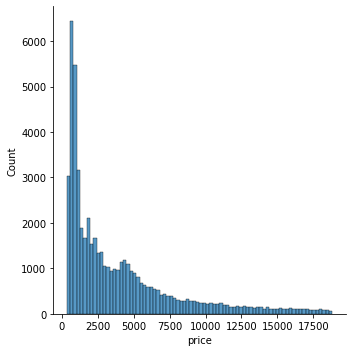

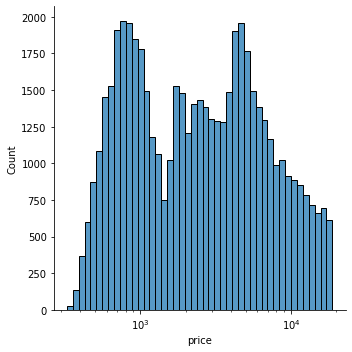

In [27]:
sns.displot(data=dia_df,x="price")
sns.displot(data=dia_df,x="price",log_scale=True)

利用kde曲线比较训练集和测试集变量分布是否一致：

<AxesSubplot:xlabel='depth', ylabel='Density'>

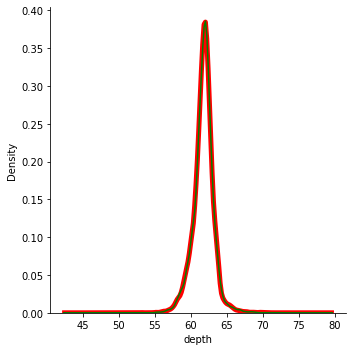

In [28]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(dia_df,test_size=0.3,random_state=42)
#sns.kdeplot(data=train_df,x="depth",marker="o")
sns.displot(data=train_df,x="depth",kind="kde",linewidth=5.0,color="r")
sns.kdeplot(data=test_df,x="depth",color="g")

##### ecdf

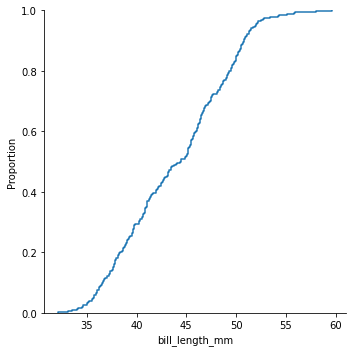

In [29]:
sns.displot(penguin_df,x="bill_length_mm",kind="ecdf")

##### FacetGrid特性

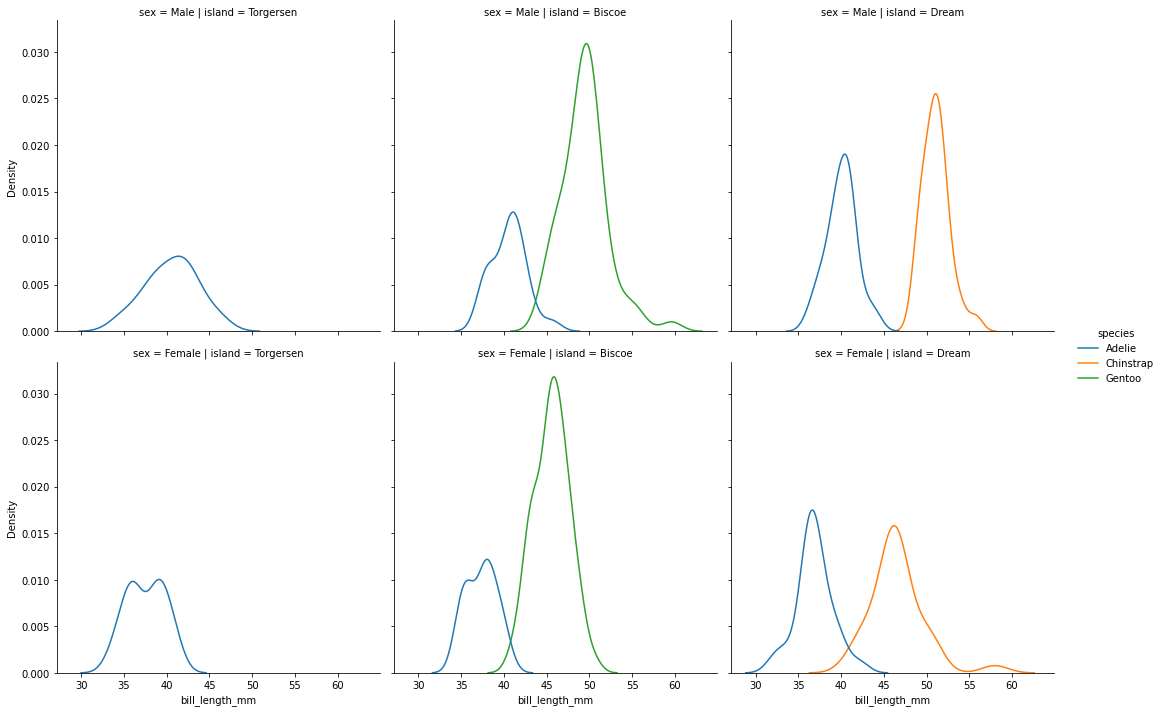

In [30]:
sns.displot(data=penguin_df,x="bill_length_mm",row="sex",col="island",hue="species",kind="kde")

### 三、（数值）变量的关系分析

#### 3.1 sns.relplot():绘制散点图

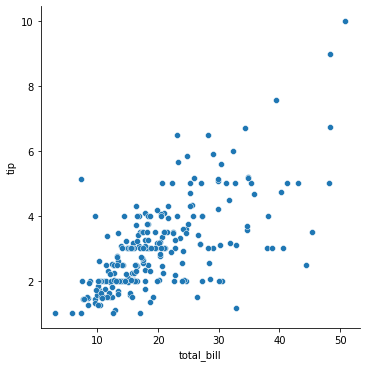

In [31]:
sns.relplot(data=tip_df,x="total_bill",y="tip")

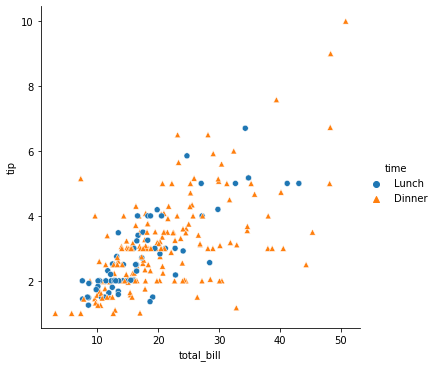

In [32]:
sns.relplot(data=tip_df,x="total_bill",y="tip",hue="time",style="time",markers=["o","^"])

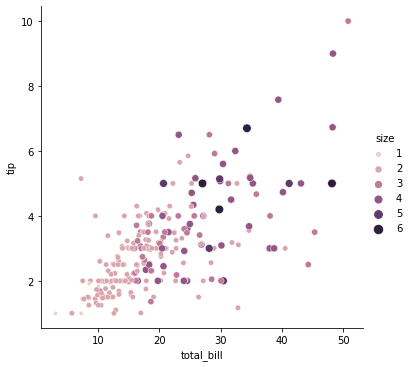

In [33]:
sns.relplot(data=tip_df,x="total_bill",y="tip",hue="size",size="size")

FacetGrid特性：

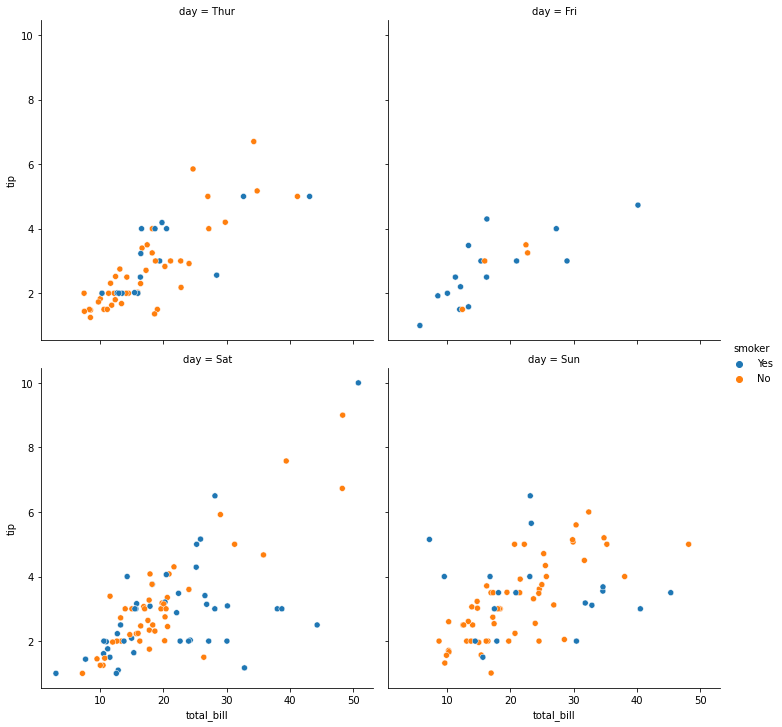

In [34]:
sns.relplot(data=tip_df,x="total_bill",y="tip",col="day",col_wrap=2,hue="smoker")

lineplot

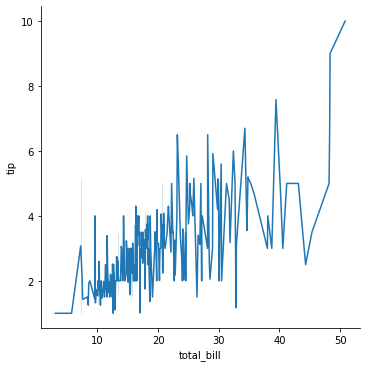

In [35]:
sns.relplot(data=tip_df,x="total_bill",y="tip",kind="line")

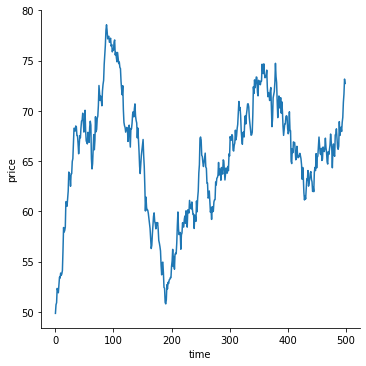

In [36]:
stock_df=pd.DataFrame(dict(time=np.arange(500),price=np.random.randn(500).cumsum()+np.ones(500)*50))
sns.relplot(data=stock_df,x="time",y="price",kind="line")

#### 3.2 sns.lmplot()：分析两个数值变量的线性关系

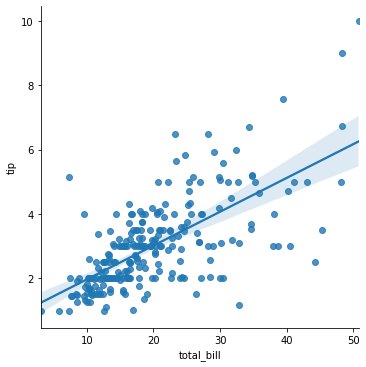

In [37]:
sns.lmplot(data=tip_df,x="total_bill",y="tip")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

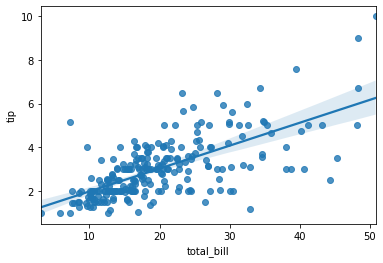

In [38]:
sns.regplot(data=tip_df,x="total_bill",y="tip")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

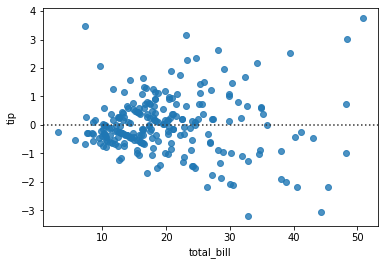

In [39]:
sns.residplot(data=tip_df,x="total_bill",y="tip")

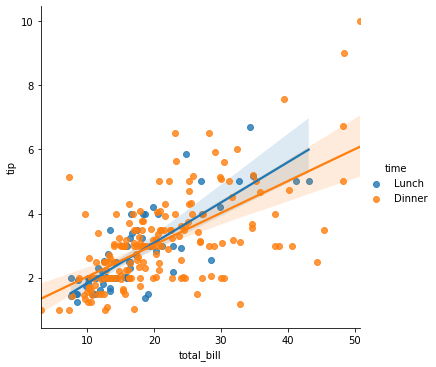

In [40]:
sns.lmplot(data=tip_df,x="total_bill",y="tip",hue="time")

FacetGrid特性：

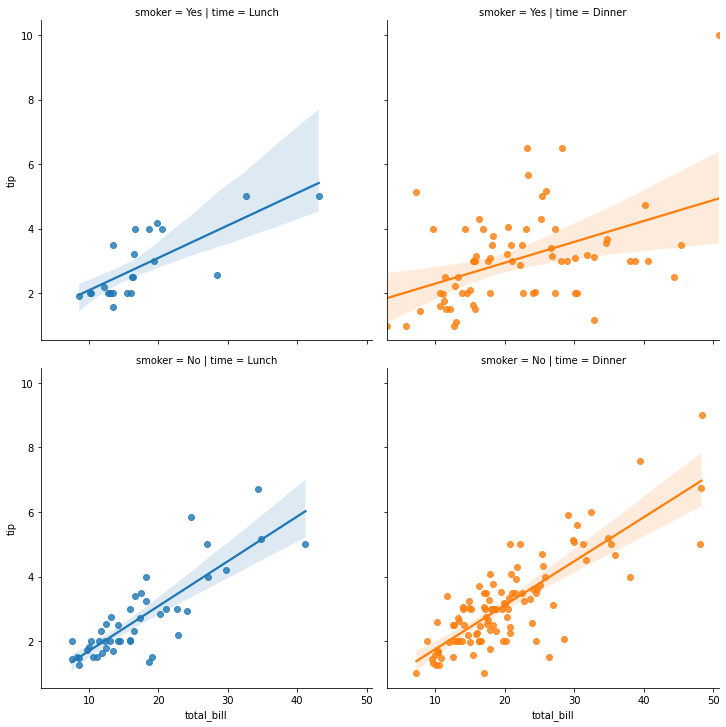

In [41]:
sns.lmplot(data=tip_df,x="total_bill",y="tip",row="smoker",col="time",hue="time")

#### 3.3 sns.displot()：绘制两个变量的联合分布

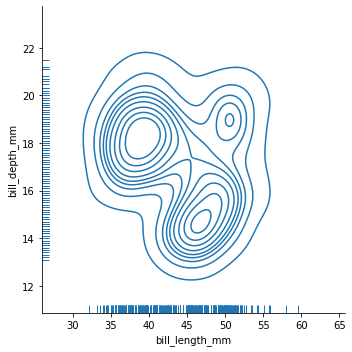

In [42]:
sns.displot(data=penguin_df,x="bill_length_mm",y="bill_depth_mm",kind="kde",rug=True)

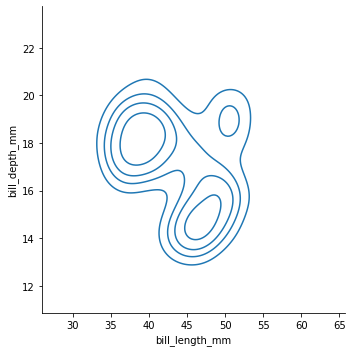

In [43]:
sns.displot(data=penguin_df,x="bill_length_mm",y="bill_depth_mm",kind="kde",thresh=0.2,levels=5)

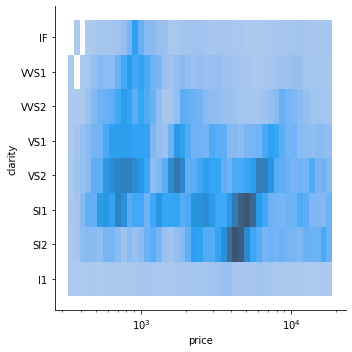

In [44]:
#log_scale
sns.displot(data=dia_df,x="price",y="clarity",log_scale=[True,False])

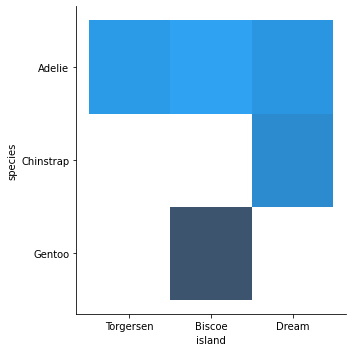

In [45]:
#两个类别变量
sns.displot(data=penguin_df,x="island",y="species")

#### 3.4 sns.jointplot()：绘制两个变量的联合分布和各自分布

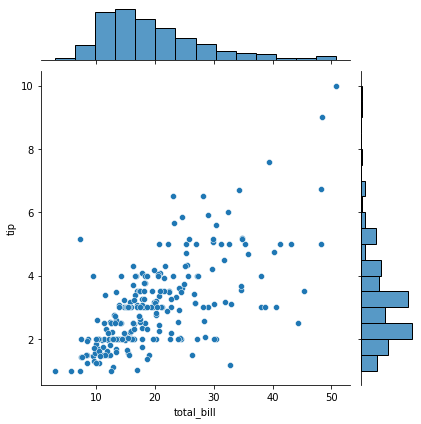

In [46]:
#kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
sns.jointplot(data=tip_df,x="total_bill",y="tip")

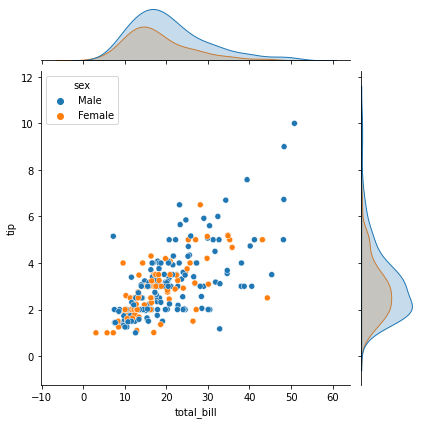

In [47]:
sns.jointplot(data=tip_df,x="total_bill",y="tip",hue="sex")

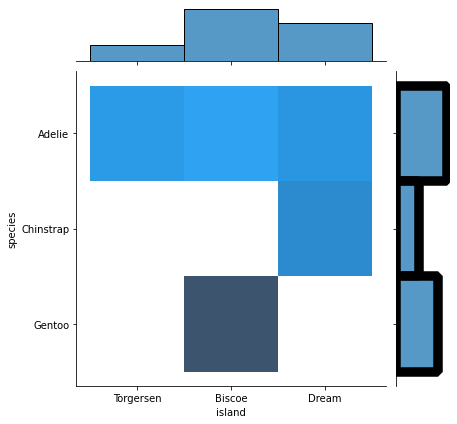

In [48]:
sns.jointplot(data=penguin_df,x="island",y="species",kind="hist")

jointplot的升级版：JointGrid，可通过g.plot()自定义函数

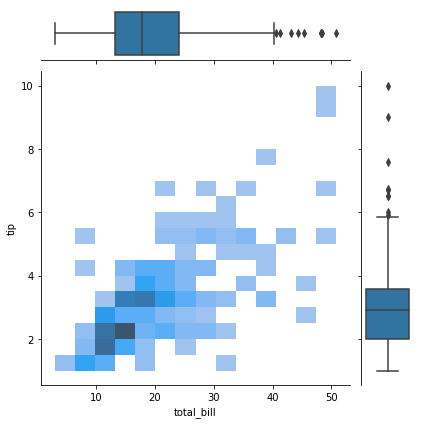

In [49]:
g=sns.JointGrid(data=tip_df,x="total_bill",y="tip")
g.plot(sns.histplot,sns.boxplot)

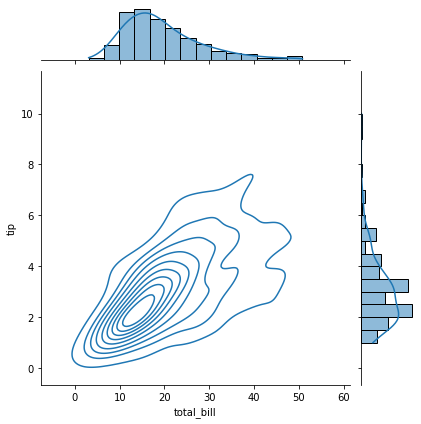

In [50]:
g=sns.JointGrid(data=tip_df,x="total_bill",y="tip")
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot,kde=True)

#### 3.5 sns.pairplot()：成对绘制所有数值变量的联合分布 

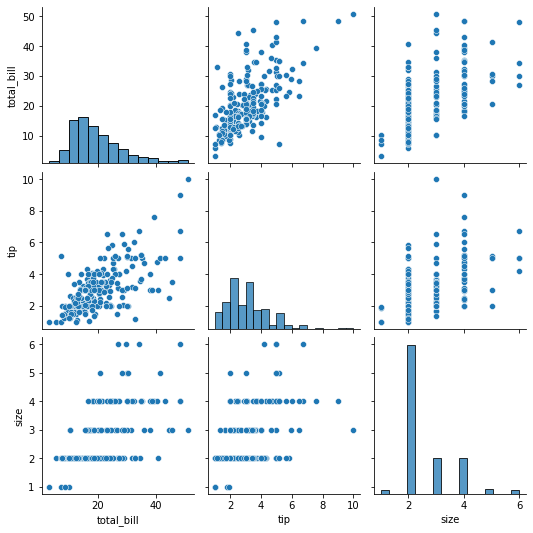

In [51]:
#kind : {'scatter', 'kde', 'hist', 'reg'}
sns.pairplot(data=tip_df)

In [52]:
#加载car_crashes数据集
car_df=sns.load_dataset("car_crashes")
car_df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


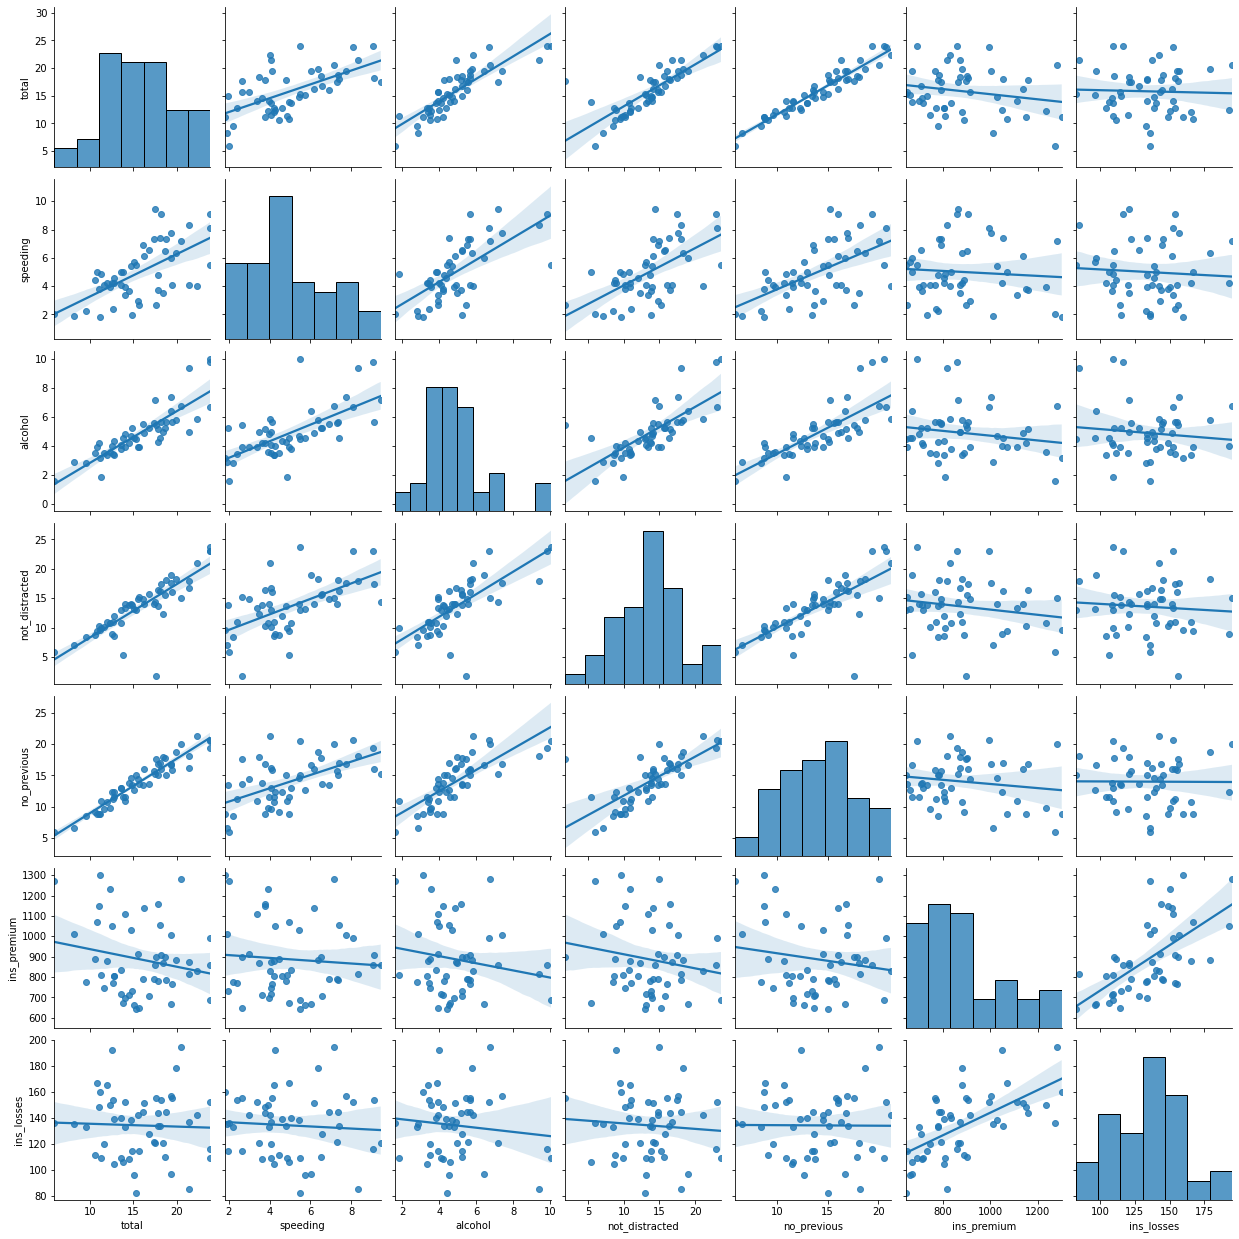

In [53]:
sns.pairplot(data=car_df,kind="reg")

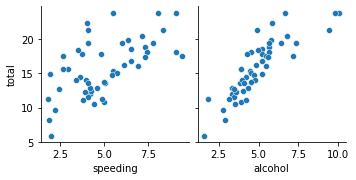

In [54]:
sns.pairplot(data=car_df,x_vars=["speeding","alcohol"],y_vars=["total"])

pairplot的升级版：PairGrid，可通过g.map()自定义绘制函数

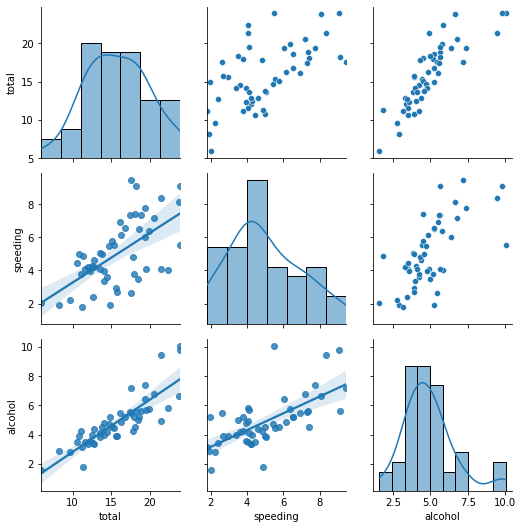

In [55]:
g=sns.PairGrid(data=car_df,x_vars=["total","speeding","alcohol"],y_vars=["total","speeding","alcohol"])
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot,kde=True)
g.map_lower(sns.regplot)

#### 3.6 data.corr()+sns.heatmap()：成对绘制所有数值变量的相关系数 

In [56]:
car_cor=car_df.corr()
car_cor

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<AxesSubplot:>

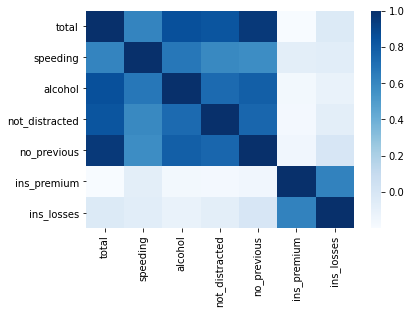

In [57]:
sns.heatmap(car_cor,cmap="Blues")

<AxesSubplot:>

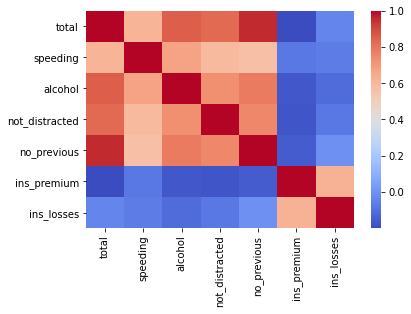

In [58]:
sns.heatmap(car_cor,cmap="coolwarm")

<AxesSubplot:>

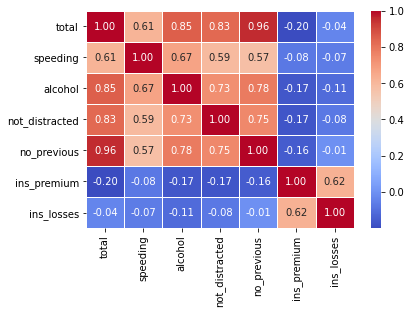

In [59]:
sns.heatmap(car_cor,cmap="coolwarm",annot=True,fmt=".2f",linewidth=0.5)

### 四、类别变量的分析

#### 4.1 类别变量的分布：sns.countplot()，类似sns.histplot()

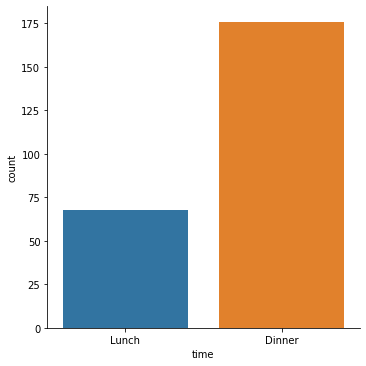

In [60]:
sns.catplot(data=tip_df,x="time",kind="count")

#### 4.2 类别变量与数值变量的关系：
##### （1）不同类别中数值变量的均值/中值估计：barplot,pointplot

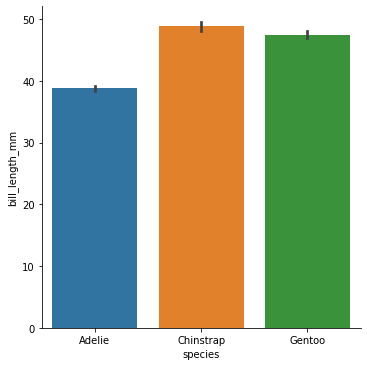

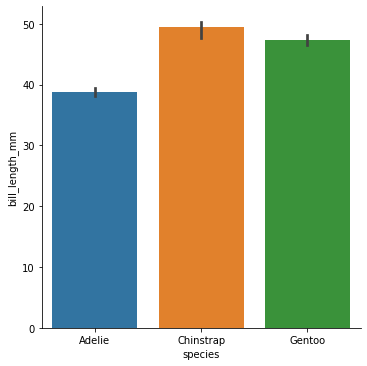

In [61]:
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="bar")
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="bar",estimator=np.median)

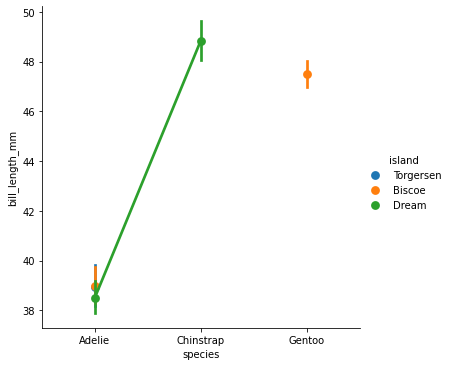

In [62]:
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="point",hue="island")

sns.catplot()的FacetGrid特性：

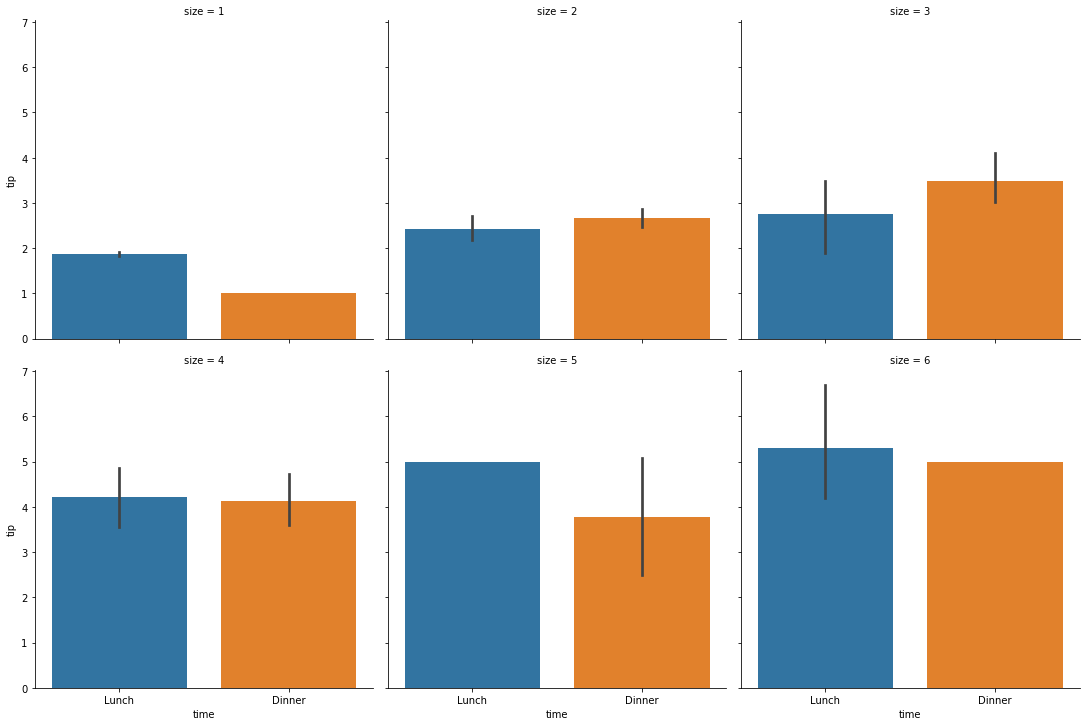

In [63]:
sns.catplot(data=tip_df,x="time",y="tip",kind="bar",col="size",col_wrap=3)

##### （2）不同类别中数值变量的取值范围：boxplot,boxenplot

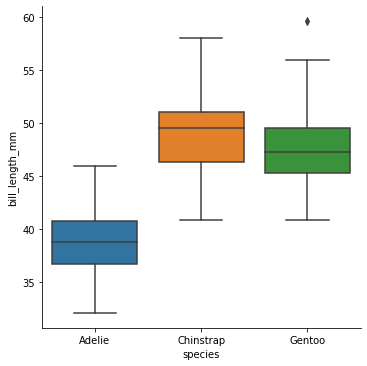

In [64]:
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="box")

boxenplot:适合大数据集

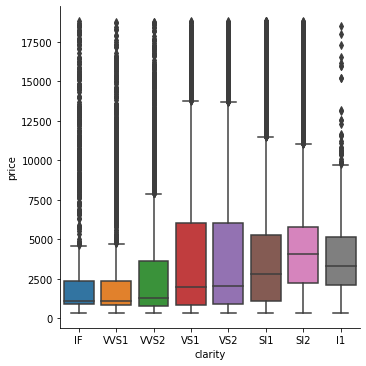

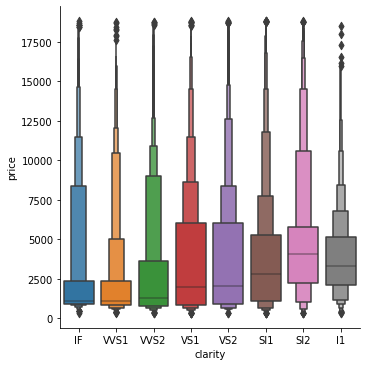

In [65]:
sns.catplot(data=dia_df,x="clarity",y="price",kind="box")
sns.catplot(data=dia_df,x="clarity",y="price",kind="boxen")

##### （3）不同类别中数值变量的分布图：stripplot,swarmplot,violinplot

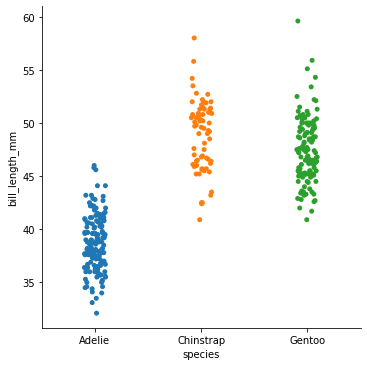

In [66]:
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="strip")

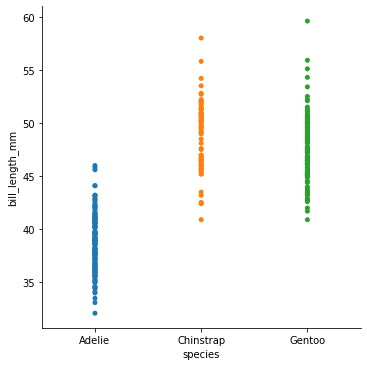

In [67]:
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="strip",jitter=False)

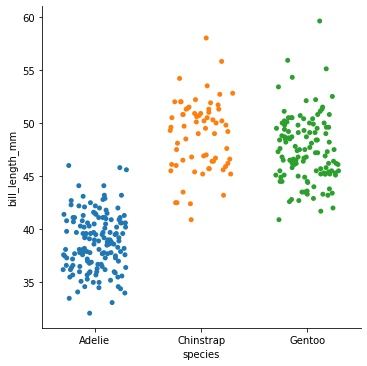

In [68]:
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="strip",jitter=0.3)

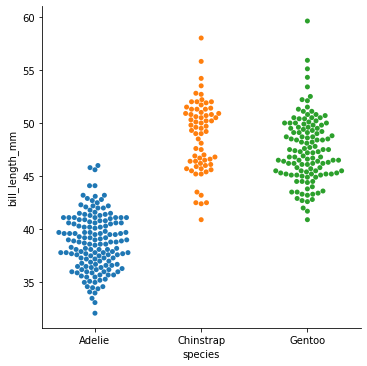

In [69]:
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="swarm")

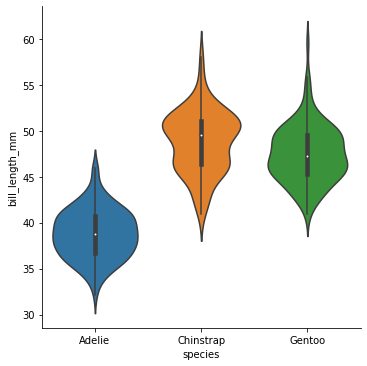

In [70]:
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="violin")

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

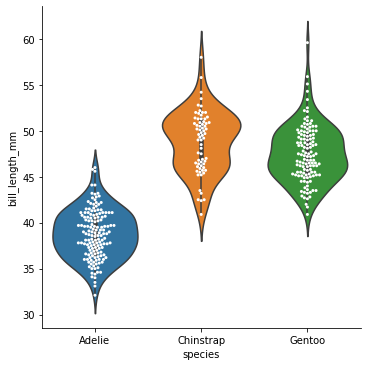

In [71]:
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="violin")
sns.swarmplot(data=penguin_df,x="species",y="bill_length_mm",color="w",size=3)

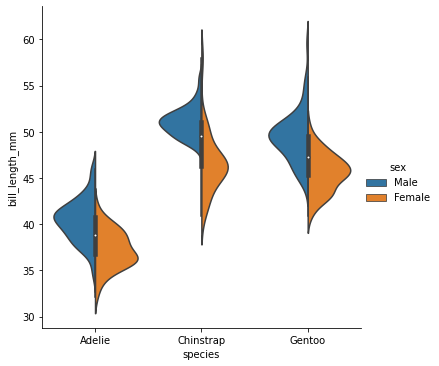

In [72]:
sns.catplot(data=penguin_df,x="species",y="bill_length_mm",hue="sex",kind="violin",split=True)

### 五、FacetGrid,PairGrid 中自定义绘制函数

FacetGrid

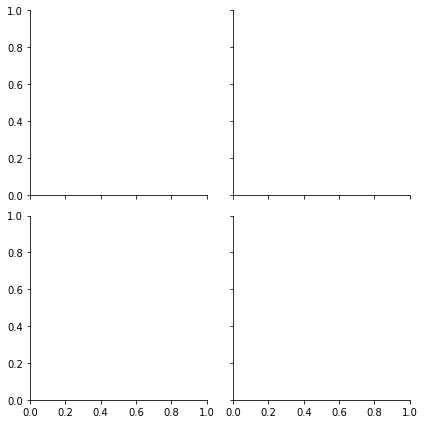

In [73]:
g=sns.FacetGrid(data=tip_df,row="time",col="smoker")

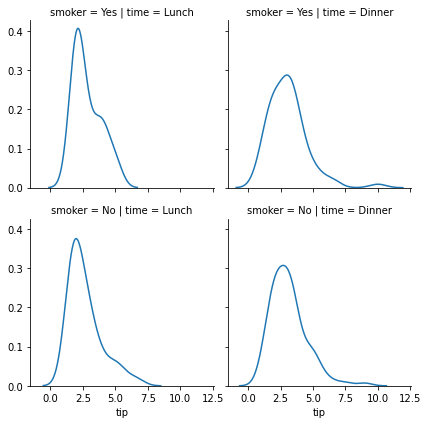

In [74]:
g=sns.FacetGrid(data=tip_df,row="smoker",col="time")
g.map(sns.kdeplot,"tip")

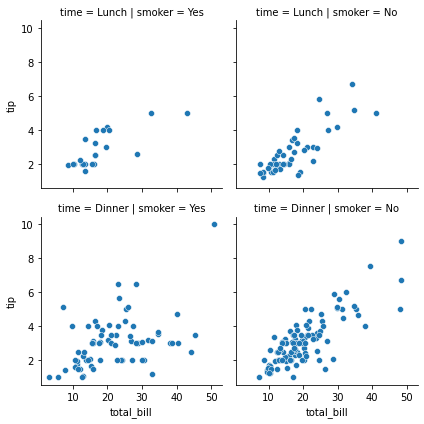

In [75]:
g=sns.FacetGrid(data=tip_df,row="time",col="smoker")
#错误：g.map(sns.scatterplot,data=tip_df,x="total_bill",y="tip")
g.map(sns.scatterplot,"total_bill","tip")

PairGrid

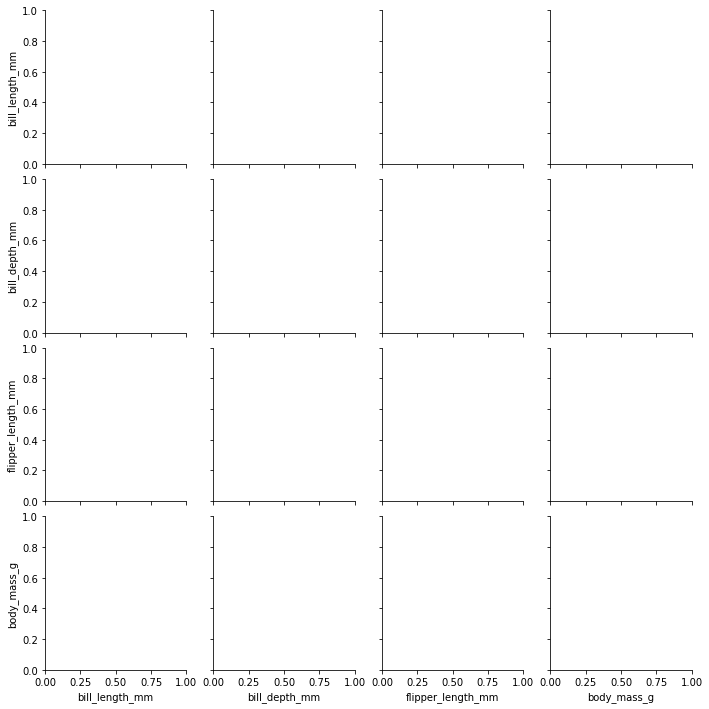

In [76]:
g=sns.PairGrid(data=penguin_df)

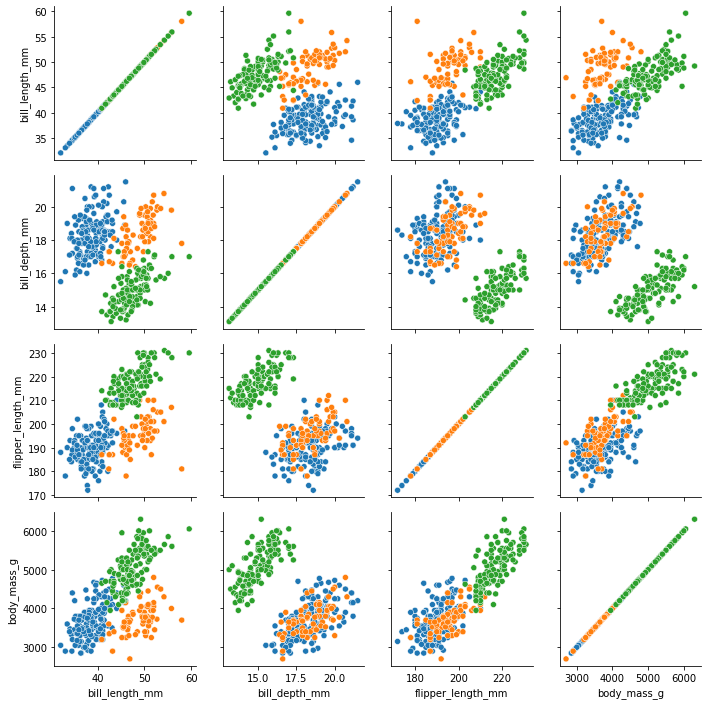

In [77]:
g=sns.PairGrid(data=penguin_df,hue="species")
g.map(sns.scatterplot)

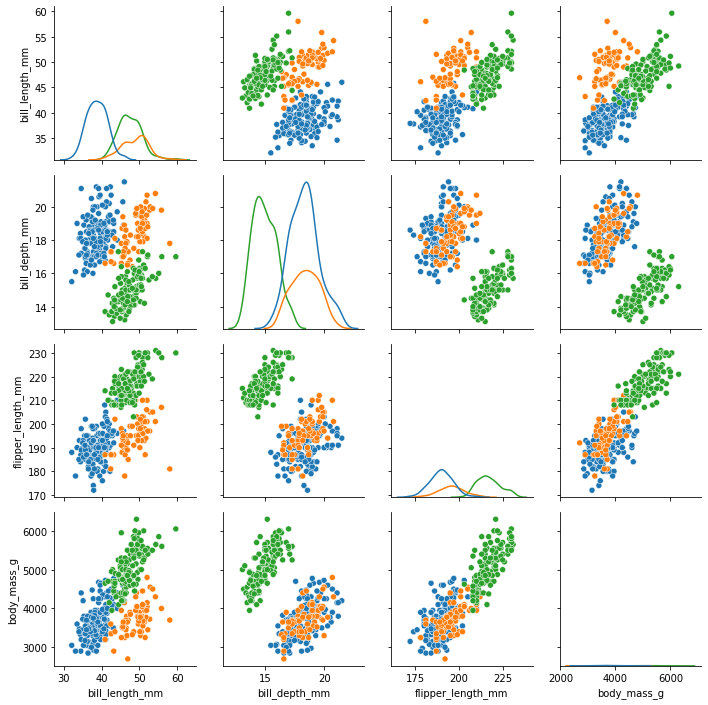

In [78]:
g=sns.PairGrid(data=penguin_df,hue="species")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

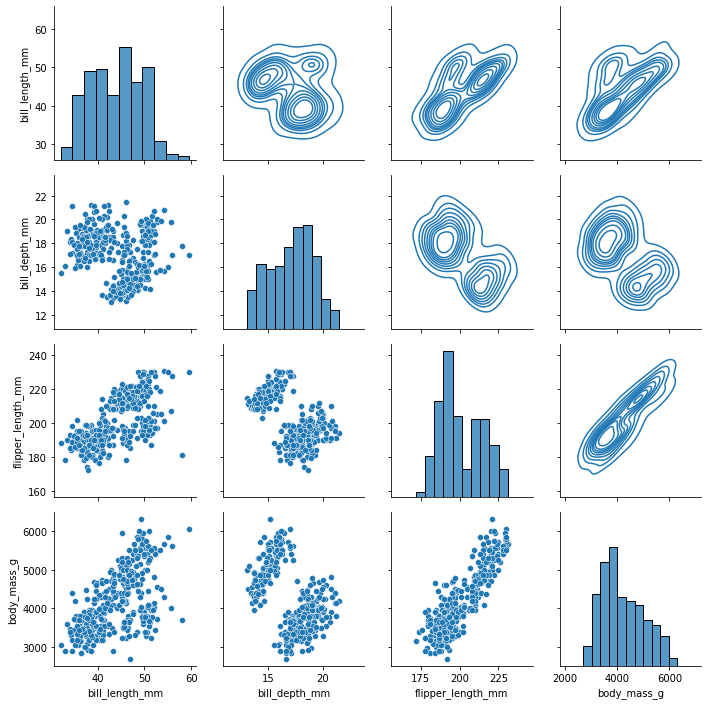

In [79]:
g=sns.PairGrid(data=penguin_df)
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)